# Supervised learning

## Install libraries

In [1]:
pip install shap

     |████████████████████████████████| 327kB 5.5MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463912 sha256=334b2a4d3bde30d982e4e784f0857ea7de1f54a6b851f3a533cdf1c188f7dc3c
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


## Import libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import RidgeCV
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
import shap

pd.set_option('max_rows', None)

## Load dataset

In [3]:
df = pd.read_excel('drive/My Drive/supervised-perspective/administrativo.xlsx', sheet_name="MUNICÍPIO")

In [4]:
df_pib = pd.read_csv('drive/My Drive/Arquivo/Datasets/PIB.csv')

## Data wrangling

### Data exploration

In [27]:
df.head()

,ANO,DESAGREGACAO,IBGE7,NOME,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,DIST_EF_TOTAL,DIST_EM_TOTAL,DIST_EF_PRI,DIST_EM_PRI,DIST_EF_PUB,DIST_EM_PUB,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TTREVA_EF_PRI,TTREVA_EM_PRI,TTREVA_EF_PUB,TTREVA_EM_PUB,IDEB_AI,IDEB_AF,PMATLINF_EF,PMATLINF_EM,PMATINT_EF,PMATINT_EM,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,DOCSUP_EF_PUB,DOCSUP_EM_PUB,DOCSUP_EF_PRI,DOCSUP_EM_PRI,TXMOINF,TXNASC7C,TXNBAIXOP,TXBRUTAMORT,TXMOHOMI,TXMODCNT,TXMOCANMA,TXMOCANPROST,...,TXMOSUI,TXMOAGR,TXOBITMATERN,TXCOBPLP,TXMAE10A14,TXMAE15A19,PINTERSAP,PINTERDRSAI,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV,REN_RENSF_D,REN_TRPCBF_D,REN_TRPCBPC_D,PDEFAGUA,PDEFESGOTO,PDEFLIXO,PDEFSAN,PANALF15,PIND_POS,PMPOB_POS,PPOB_POS,PBF,SNIS_PAGUA,SNIS_PESGOTO,SNIS_PESGTRA,SNIS_PCOLSEL,SNIS_CDI,PFOCOS,PFLORA,PFEM_VEREADOR,PFEM_PREFEITO,PFEM_GOVERNADOR,PFEM_DEP_ESTADUAL,PFEM_DEP_FEDERAL,PFEM_SENADOR,POP_TOT
0,2013,TOTAL,1100015,Alta Floresta D&apos;Oeste,99.26,100.00,0.74,NaN,25.8,29.6,NaN,NaN,25.9,29.6,3.4,9.2,3.3,NaN,3.4,9.2,5.4,3.9,48.38,100.00,66.25,100.0,48.1,46.0,47.8,46.0,66.7,NaN,18.324607,64.397906,3.926702,4.353234,15.547264,198.227612,8.078324,14.982177,...,7.773632,15.547264,0.000000,12.546642,0.785340,19.895288,40.164900,11.119403,11.10,10.29,34.16,6.27,37.08,22.50,921.94,111.29,118.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.59,NaN,NaN,NaN,100.0,0.51,66.02,20.00,0.0,NaN,NaN,NaN,NaN,25728
1,2013,TOTAL,1100023,Ariquemes,91.12,94.80,8.88,5.20,24.5,27.1,4.2,3.1,26.3,28.5,3.0,9.1,0.3,1.8,3.2,9.5,4.9,4.2,89.38,92.90,89.27,100.0,57.7,57.9,59.9,57.6,43.3,63.7,11.487304,55.804111,7.799274,4.710227,62.210548,225.142936,9.955455,19.590450,...,1.974938,62.210548,60.459492,7.972825,0.725514,21.342201,22.866741,2.586370,14.88,12.96,5.79,22.04,29.00,43.17,1168.11,77.75,152.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.20,NaN,NaN,NaN,100.0,0.49,34.67,7.69,0.0,NaN,NaN,NaN,NaN,101269
2,2013,TOTAL,1100031,Cabixi,100.00,100.00,NaN,NaN,18.1,18.7,NaN,NaN,18.1,18.7,1.5,6.9,NaN,NaN,1.5,6.9,5.6,4.1,83.74,89.69,100.00,100.0,68.4,64.9,68.4,64.9,NaN,NaN,13.513514,52.702703,6.756757,3.541186,0.000000,230.946882,0.000000,0.000000,...,15.396459,NaN,NaN,3.479600,1.351351,13.513514,38.009050,7.641921,12.42,11.59,41.45,3.70,35.58,19.27,1035.36,108.25,74.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.44,NaN,NaN,NaN,100.0,0.13,32.01,11.11,0.0,NaN,NaN,NaN,NaN,6495
3,2013,TOTAL,1100049,Cacoal,85.55,82.90,14.45,17.10,19.3,24.6,4.2,6.5,21.9,29.4,2.4,9.3,0.3,1.2,2.8,11.4,5.8,4.5,77.93,94.64,80.42,100.0,54.5,56.6,55.4,57.2,49.9,54.4,15.189873,68.776371,6.413502,4.414008,18.634336,270.197873,9.278671,16.372975,...,1.164646,17.469690,0.000000,8.680107,0.590717,18.396624,31.855783,3.684514,13.97,12.12,11.02,10.99,31.01,46.97,1228.34,77.67,130.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,55.42,100.0,NaN,100.0,0.13,37.07,8.33,0.0,NaN,NaN,NaN,NaN,85863
4,2013,TOTAL,1100056,Cerejeiras,97.18,97.47,2.82,2.53,21.1,21.1,5.6,NaN,21.5,21.7,2.5,8.5,1.3,0.0,2.6,8.8,6.2,3.6,71.05,97.47,100.00,100.0,71.1,58.3,71.1,58.3,71.4,58.3,11.070111,58.302583,3.690037,5.598359,16.628790,277.146500,0.000000,22.077080,...,NaN,16.628790,0.000000,3.486503,1.107011,21.402214,39.698492,15.279188,16.39,13.46,15.17,6.68,27.91,50.24,1147.02,81.75,147.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.67,NaN,NaN,NaN,NaN,0.19,63.12,0.00,0.0,NaN,NaN,NaN,NaN,18041


In [28]:
df_pib.head()

,Codigo,Municípios,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1100015,Alta Floresta D'Oeste,111291,"143222,38","173990,79","167127,36","168805,06","191364,33","248961,79","256986,14","262076,88","280509,58","329029,48","341324,69",377799,"421299,98","478216,98","498864,19"
1,1100023,Ariquemes,"449592,82","539636,21","657193,23","749021,19","790696,63","905202,63","1064821,96","1133094,86","1364693,78","1651885,02","1703641,94","1799852,51","1921531,62","2037798,61","2184346,1","2296073,71"
2,1100031,Cabixi,"31767,52","40984,57","43392,5","49129,64","46883,82","49165,76","60587,71",69776,"69611,11","77217,19","99586,48","96364,54","113477,4","116565,18","133342,25","138893,55"
3,1100049,Cacoal,"474443,1","622437,19","622414,64","758959,55","743193,72","814890,27","928698,7","985478,84","1186494,09","1259024,29","1372705,09","1433253,51","1660649,61","1794477,51","1947282,54","2127523,25"
4,1100056,Cerejeiras,"79173,61","99983,39","121365,67","129106,97","124414,95","143269,95","167474,35","190902,13","222021,19","260142,1",357333,"353269,68","392416,84","397736,13","408193,83","448524,17"


In [29]:
df_2017 = df[df['ANO'] == 2017]

In [30]:
df_2017.head()

,ANO,DESAGREGACAO,IBGE7,NOME,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,PMATPRI_EM,DIST_EF_TOTAL,DIST_EM_TOTAL,DIST_EF_PRI,DIST_EM_PRI,DIST_EF_PUB,DIST_EM_PUB,TTREVA_EF_TOTAL,TTREVA_EM_TOTAL,TTREVA_EF_PRI,TTREVA_EM_PRI,TTREVA_EF_PUB,TTREVA_EM_PUB,IDEB_AI,IDEB_AF,PMATLINF_EF,PMATLINF_EM,PMATINT_EF,PMATINT_EM,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,DOCSUP_EF_PUB,DOCSUP_EM_PUB,DOCSUP_EF_PRI,DOCSUP_EM_PRI,TXMOINF,TXNASC7C,TXNBAIXOP,TXBRUTAMORT,TXMOHOMI,TXMODCNT,TXMOCANMA,TXMOCANPROST,...,TXMOSUI,TXMOAGR,TXOBITMATERN,TXCOBPLP,TXMAE10A14,TXMAE15A19,PINTERSAP,PINTERDRSAI,REN_PIBPC_D,REN_VAPC_D,REN_PVAAGR,REN_PVAIND,REN_PVAADM,REN_PVASERV,REN_RENSF_D,REN_TRPCBF_D,REN_TRPCBPC_D,PDEFAGUA,PDEFESGOTO,PDEFLIXO,PDEFSAN,PANALF15,PIND_POS,PMPOB_POS,PPOB_POS,PBF,SNIS_PAGUA,SNIS_PESGOTO,SNIS_PESGTRA,SNIS_PCOLSEL,SNIS_CDI,PFOCOS,PFLORA,PFEM_VEREADOR,PFEM_PREFEITO,PFEM_GOVERNADOR,PFEM_DEP_ESTADUAL,PFEM_DEP_FEDERAL,PFEM_SENADOR,POP_TOT
22280,2017,TOTAL,1100015,Alta Floresta D&apos;Oeste,100.00,100.00,NaN,NaN,19.9,25.1,NaN,NaN,19.9,25.1,NaN,NaN,NaN,NaN,NaN,NaN,6.2,4.8,46.44,97.61,85.47,97.61,58.1,61.7,58.1,61.7,NaN,NaN,14.124294,67.231638,6.497175,5.385855,15.725125,298.777372,24.512222,7.576787,...,11.793844,15.725125,0.00000,6.006998,0.282486,17.231638,41.526779,4.639941,NaN,NaN,NaN,NaN,NaN,NaN,1118.45,79.30,142.56,80.81,93.09,53.62,50.15,13.02,23.23,67.81,84.71,66.31,73.27,NaN,NaN,NaN,NaN,0.52,65.44,10.00,0.0,NaN,NaN,NaN,NaN,25437
22281,2017,TOTAL,1100023,Ariquemes,89.42,95.84,10.58,4.16,18.4,30.3,2.9,4.2,20.2,31.4,NaN,NaN,NaN,NaN,NaN,NaN,5.5,4.9,72.50,84.56,95.09,95.44,62.3,64.5,63.4,64.8,57.0,59.5,13.341067,79.582367,7.076566,4.676510,44.715636,248.730728,5.635171,12.937107,...,9.315758,43.784061,58.00464,7.060413,0.696056,19.025522,25.149496,2.228086,NaN,NaN,NaN,NaN,NaN,NaN,1205.80,41.87,178.73,64.66,89.42,14.74,13.47,9.72,21.40,63.52,79.91,57.66,94.81,2.05,100.0,NaN,95.71,0.78,31.87,7.69,0.0,NaN,NaN,NaN,NaN,107345
22282,2017,TOTAL,1100031,Cabixi,100.00,100.00,NaN,NaN,11.8,27.8,NaN,NaN,11.8,27.8,NaN,NaN,NaN,NaN,NaN,NaN,6.1,5.1,32.67,90.56,100.00,100.00,73.5,60.7,73.5,60.7,NaN,NaN,0.000000,71.641791,4.477612,4.659383,80.334190,208.868895,0.000000,0.000000,...,NaN,80.334190,NaN,3.309769,NaN,11.940299,47.036329,7.473310,NaN,NaN,NaN,NaN,NaN,NaN,1037.56,36.76,103.04,64.37,40.09,40.23,17.92,9.87,11.09,52.06,75.32,47.87,85.80,NaN,NaN,NaN,100.00,0.06,28.94,0.00,0.0,NaN,NaN,NaN,NaN,6224
22283,2017,TOTAL,1100049,Cacoal,82.46,80.47,17.54,19.53,12.0,25.5,2.6,11.9,14.0,28.8,NaN,NaN,NaN,NaN,NaN,NaN,6.3,5.1,60.15,93.19,87.22,97.80,62.0,53.5,60.8,54.2,66.4,50.6,9.641873,78.994490,6.887052,5.660569,12.428395,353.644345,15.752601,29.498596,...,5.649271,12.428395,0.00000,9.070469,0.344353,13.360882,23.989491,2.054172,NaN,NaN,NaN,NaN,NaN,NaN,1204.73,29.62,156.91,26.36,56.03,22.47,20.70,8.43,13.45,52.71,76.88,47.86,100.00,59.64,100.0,NaN,NaN,0.18,36.13,8.33,100.0,NaN,NaN,NaN,NaN,88507
22284,2017,TOTAL,1100056,Cerejeiras,96.31,97.47,3.69,2.53,15.1,26.9,4.7,25.0,15.5,26.9,NaN,NaN,NaN,NaN,NaN,NaN,6.4,5.3,46.70,100.00,100.00,100.00,65.0,39.4,65.8,39.2,54.4,41.7,3.610108,74.368231,8.664260,4.516561,27.880004,250.920040,22.400028,22.208799,...,5.576001,27.880004,0.00000,3.813985,0.361011,16.245487,37.159920,6.461174,NaN,NaN,NaN,NaN,NaN,NaN,1230.71,44.39,172.70,68.13,91.35,11.01,10.22,7.04,16.56,51.82,68.43,46.38,64.95,NaN,NaN,NaN,100.00,0.49,65.06,0.00,0.0,NaN,NaN,NaN,NaN,17934


In [31]:
df_2017.shape

(5570, 82)

In [32]:
df_2017.dtypes

ANO                    int64
DESAGREGACAO          object
IBGE7                  int64
NOME                  object
PMATPUB_EF           float64
PMATPUB_EM           float64
PMATPRI_EF           float64
PMATPRI_EM           float64
DIST_EF_TOTAL        float64
DIST_EM_TOTAL        float64
DIST_EF_PRI          float64
DIST_EM_PRI          float64
DIST_EF_PUB          float64
DIST_EM_PUB          float64
TTREVA_EF_TOTAL      float64
TTREVA_EM_TOTAL      float64
TTREVA_EF_PRI        float64
TTREVA_EM_PRI        float64
TTREVA_EF_PUB        float64
TTREVA_EM_PUB        float64
IDEB_AI              float64
IDEB_AF              float64
PMATLINF_EF          float64
PMATLINF_EM          float64
PMATINT_EF           float64
PMATINT_EM           float64
DOCSUP_EF_TOTAL      float64
DOCSUP_EM_TOTAL      float64
DOCSUP_EF_PUB        float64
DOCSUP_EM_PUB        float64
DOCSUP_EF_PRI        float64
DOCSUP_EM_PRI        float64
TXMOINF              float64
TXNASC7C             float64
TXNBAIXOP     

In [33]:
df_2017.isnull().mean()

ANO                  0.000000
DESAGREGACAO         0.000000
IBGE7                0.000000
NOME                 0.000000
PMATPUB_EF           0.000000
PMATPUB_EM           0.001616
PMATPRI_EF           0.457989
PMATPRI_EM           0.716876
DIST_EF_TOTAL        0.000000
DIST_EM_TOTAL        0.001795
DIST_EF_PRI          0.526032
DIST_EM_PRI          0.717056
DIST_EF_PUB          0.000000
DIST_EM_PUB          0.001795
TTREVA_EF_TOTAL      1.000000
TTREVA_EM_TOTAL      1.000000
TTREVA_EF_PRI        1.000000
TTREVA_EM_PRI        1.000000
TTREVA_EF_PUB        1.000000
TTREVA_EM_PUB        1.000000
IDEB_AI              0.016876
IDEB_AF              0.019390
PMATLINF_EF          0.000000
PMATLINF_EM          0.001616
PMATINT_EF           0.000000
PMATINT_EM           0.001616
DOCSUP_EF_TOTAL      0.000000
DOCSUP_EM_TOTAL      0.001616
DOCSUP_EF_PUB        0.000000
DOCSUP_EM_PUB        0.001616
DOCSUP_EF_PRI        0.458528
DOCSUP_EM_PRI        0.716876
TXMOINF              0.025314
TXNASC7C  

### Missing values treatment

In [43]:
df_2017 = df_2017.dropna(axis=1, how='all')

In [44]:
df_2017 = df_2017.loc[:, df.isnull().mean() < .5]

In [45]:
df_2017.shape

(5570, 58)

In [46]:
df_2017 = df_2017.fillna(df_2017.median())

In [47]:
df_2017.isnull().sum().sum()

0

### Aggregation

In [48]:
df_pib_2017 = df_pib[['Codigo', 'Municípios', '2017']]

In [49]:
df_agg = pd.merge(df_2017, df_pib_2017, left_on='IBGE7', right_on='Codigo')

In [50]:
df_agg.head()

,ANO,DESAGREGACAO,IBGE7,NOME,PMATPUB_EF,PMATPUB_EM,PMATPRI_EF,DIST_EF_TOTAL,DIST_EM_TOTAL,DIST_EF_PUB,DIST_EM_PUB,IDEB_AI,IDEB_AF,PMATLINF_EF,PMATLINF_EM,PMATINT_EF,PMATINT_EM,DOCSUP_EF_TOTAL,DOCSUP_EM_TOTAL,DOCSUP_EF_PUB,DOCSUP_EM_PUB,DOCSUP_EF_PRI,TXMOINF,TXNASC7C,TXNBAIXOP,TXBRUTAMORT,TXMOHOMI,TXMODCNT,TXMOCANMA,TXMOCANPROST,TXHIV,TXMOATRA,TXMOSUI,TXMOAGR,TXCOBPLP,TXMAE10A14,TXMAE15A19,PINTERSAP,PINTERDRSAI,REN_RENSF_D,REN_TRPCBF_D,REN_TRPCBPC_D,PDEFAGUA,PDEFESGOTO,PDEFLIXO,PDEFSAN,PANALF15,PIND_POS,PMPOB_POS,PPOB_POS,PBF,SNIS_PAGUA,SNIS_CDI,PFOCOS,PFLORA,PFEM_VEREADOR,PFEM_PREFEITO,POP_TOT,Codigo,Municípios,2017
0,2017,TOTAL,1100015,Alta Floresta D&apos;Oeste,100.00,100.00,8.31,19.9,25.1,19.9,25.1,6.2,4.8,46.44,97.61,85.47,97.61,58.1,61.7,58.1,61.7,46.15,14.124294,67.231638,6.497175,5.385855,15.725125,298.777372,24.512222,7.576787,0.000000,43.244093,11.793844,15.725125,6.006998,0.282486,17.231638,41.526779,4.639941,1118.45,79.30,142.56,80.81,93.09,53.62,50.15,13.02,23.23,67.81,84.71,66.31,73.27,100.00,0.52,65.44,10.00,0.0,25437,1100015,Alta Floresta D'Oeste,"498864,19"
1,2017,TOTAL,1100023,Ariquemes,89.42,95.84,10.58,18.4,30.3,20.2,31.4,5.5,4.9,72.50,84.56,95.09,95.44,62.3,64.5,63.4,64.8,57.00,13.341067,79.582367,7.076566,4.676510,44.715636,248.730728,5.635171,12.937107,0.000000,24.220970,9.315758,43.784061,7.060413,0.696056,19.025522,25.149496,2.228086,1205.80,41.87,178.73,64.66,89.42,14.74,13.47,9.72,21.40,63.52,79.91,57.66,94.81,95.71,0.78,31.87,7.69,0.0,107345,1100023,Ariquemes,"2296073,71"
2,2017,TOTAL,1100031,Cabixi,100.00,100.00,8.31,11.8,27.8,11.8,27.8,6.1,5.1,32.67,90.56,100.00,100.00,73.5,60.7,73.5,60.7,46.15,0.000000,71.641791,4.477612,4.659383,80.334190,208.868895,0.000000,0.000000,16.066838,48.200514,9.956193,80.334190,3.309769,1.139601,11.940299,47.036329,7.473310,1037.56,36.76,103.04,64.37,40.09,40.23,17.92,9.87,11.09,52.06,75.32,47.87,85.80,100.00,0.06,28.94,0.00,0.0,6224,1100031,Cabixi,"138893,55"
3,2017,TOTAL,1100049,Cacoal,82.46,80.47,17.54,12.0,25.5,14.0,28.8,6.3,5.1,60.15,93.19,87.22,97.80,62.0,53.5,60.8,54.2,66.40,9.641873,78.994490,6.887052,5.660569,12.428395,353.644345,15.752601,29.498596,21.467229,32.765770,5.649271,12.428395,9.070469,0.344353,13.360882,23.989491,2.054172,1204.73,29.62,156.91,26.36,56.03,22.47,20.70,8.43,13.45,52.71,76.88,47.86,100.00,100.00,0.18,36.13,8.33,100.0,88507,1100049,Cacoal,"2127523,25"
4,2017,TOTAL,1100056,Cerejeiras,96.31,97.47,3.69,15.1,26.9,15.5,26.9,6.4,5.3,46.70,100.00,100.00,100.00,65.0,39.4,65.8,39.2,54.40,3.610108,74.368231,8.664260,4.516561,27.880004,250.920040,22.400028,22.208799,11.152002,33.456005,5.576001,27.880004,3.813985,0.361011,16.245487,37.159920,6.461174,1230.71,44.39,172.70,68.13,91.35,11.01,10.22,7.04,16.56,51.82,68.43,46.38,64.95,100.00,0.49,65.06,0.00,0.0,17934,1100056,Cerejeiras,"448524,17"


In [51]:
df_agg['2017'] = df_agg['2017'].str.replace(',', '.').astype(float)

## Modeling

### Training set and test set preparation

In [52]:
X = df_agg.drop(columns=['ANO', 'DESAGREGACAO', 'IBGE7', 'NOME', 'POP_TOT', 'Codigo', 'Municípios', '2017'])

In [53]:
y = np.array(df_agg['2017']).reshape(-1, 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [55]:
target_scaler = MinMaxScaler()
target_scaler.fit(y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [56]:
y_train = target_scaler.transform(y_train)
y_test = target_scaler.transform(y_test)

## Random Forest

### Model definition

In [57]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Model evaluation

In [ ]:
pred = rf.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error (MAE): 0.004352530334088638
Mean Squared Error (MSE): 0.002097144721831077
Root Mean Squared Error (RMSE): 0.04579459271389011


### Feature importance

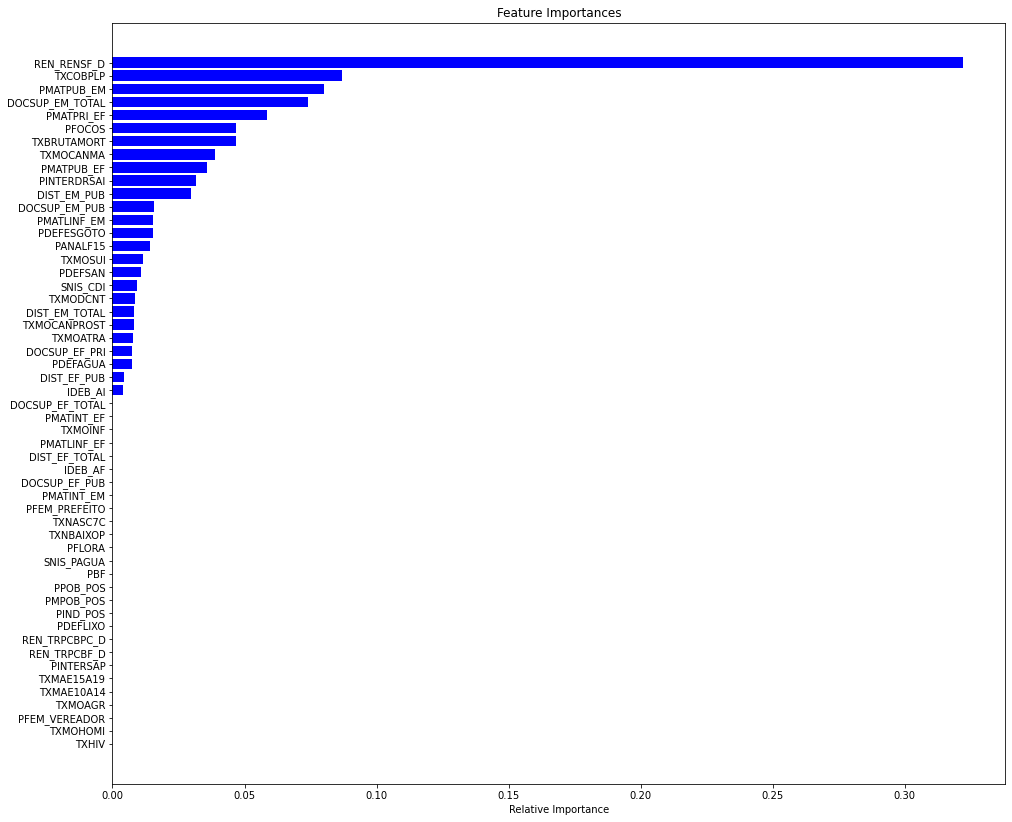

In [ ]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,14))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5, 0, 'Permutation Importance')

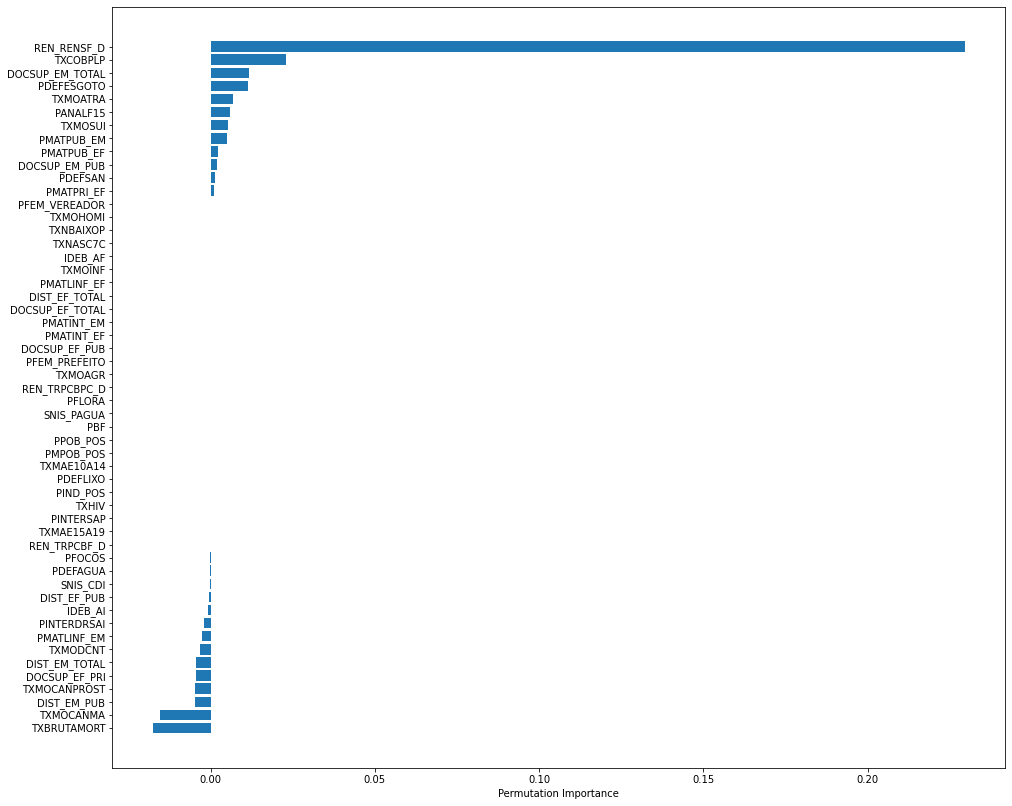

In [ ]:
perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(16,14))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

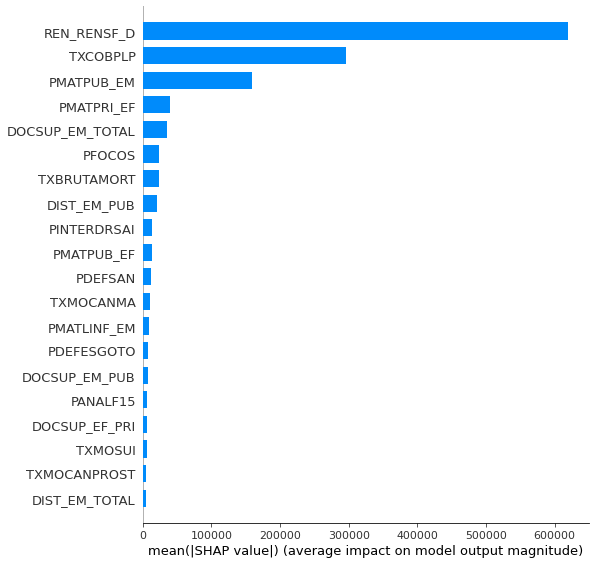

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

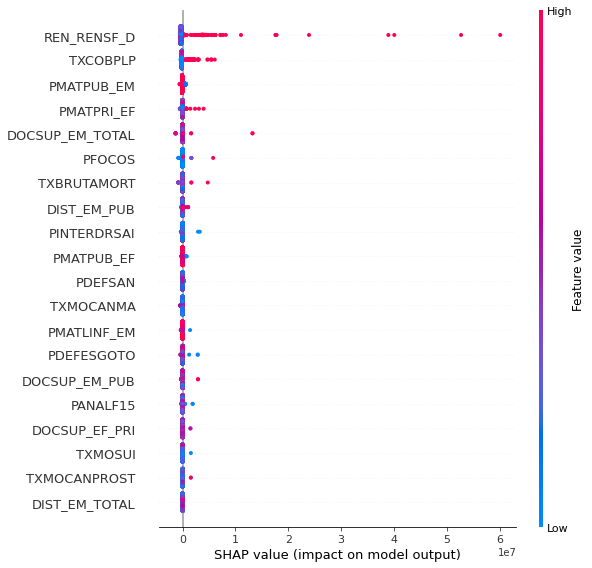

In [ ]:
shap.summary_plot(shap_values, X_test)

## AdaBoostRegressor

In [62]:
ab = AdaBoostRegressor(random_state=0, n_estimators=100)
ab.fit(X_train, y_train.ravel())

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=0)

In [64]:
pred = ab.predict(X_test)

In [65]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error (MAE): 0.012243572491980078
Mean Squared Error (MSE): 0.0026221088840656915
Root Mean Squared Error (RMSE): 0.05120653165432796


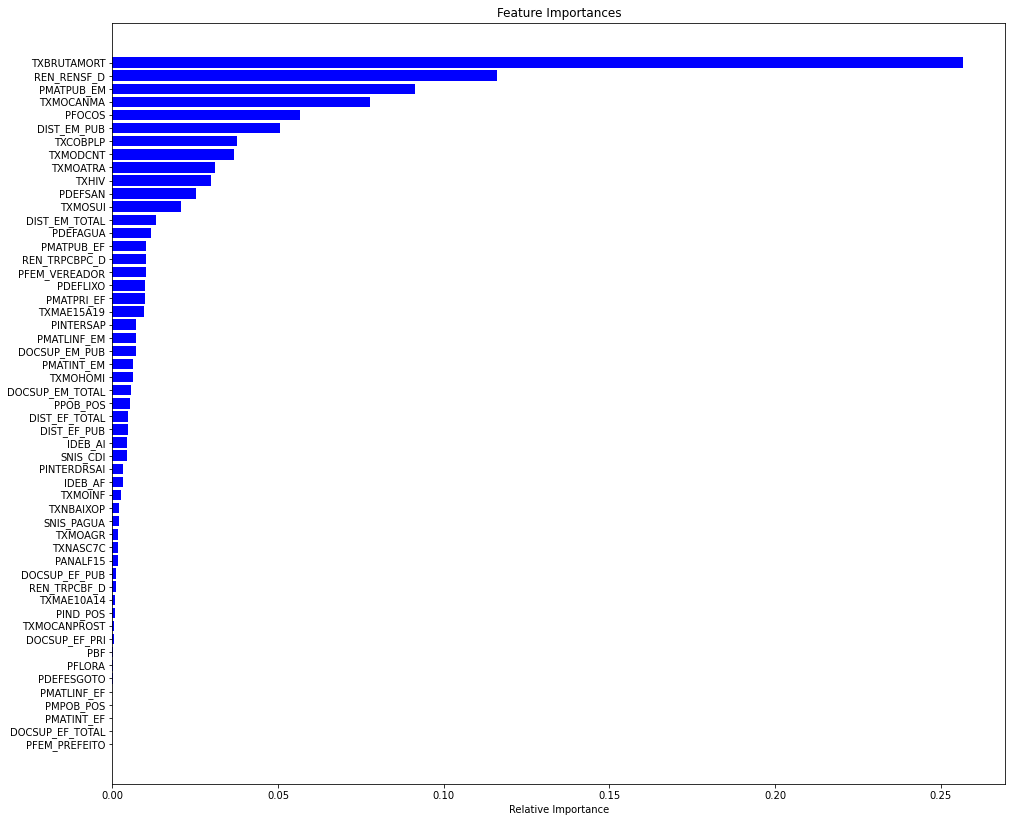

In [66]:
features = X.columns
importances = ab.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,14))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Stacking Regressor

In [83]:
estimators = [
    ('lr', RidgeCV()),
    ('svr', RandomForestRegressor(n_estimators=10,
                                  random_state=42))
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=AdaBoostRegressor()
)

In [84]:
reg.fit(X_train, y_train.ravel())

StackingRegressor(cv=None,
                  estimators=[('lr',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                       cv=None, fit_intercept=True,
                                       gcv_mode=None, normalize=False,
                                       scoring=None, store_cv_values=False)),
                              ('svr',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                 

In [85]:
pred = reg.predict(X_test)

In [86]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error (MAE): 0.004459991148031147
Mean Squared Error (MSE): 0.0026759114189773047
Root Mean Squared Error (RMSE): 0.05172921243337564


## MLP Regressor

In [119]:
mlp = MLPRegressor(random_state=42, hidden_layer_sizes=10, max_iter=250)
mlp.fit(X_train, y_train.ravel())

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=10, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=250,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [120]:
pred = mlp.predict(X_test)

In [121]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error (MAE): 0.12605238816417835
Mean Squared Error (MSE): 0.2827315469724051
Root Mean Squared Error (RMSE): 0.5317250670905079
